In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import time

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Data
The data is from Zillow. It is the median house price for each zip code every month since 1996.

In [2]:
zc = pd.read_csv('Zip_Zhvi_AllHomes.csv', encoding = "ISO-8859-1")

In [3]:
zc.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,168300.0,168400.0,168400.0,...,1078900,1071800,1067600,1054400,1030700,1015300,1008600,988500,971100,966900
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,160000.0,161000.0,161700.0,...,348500,350400,352500,353100,352900,353100,352400,350400,347500,344900
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,353100.0,353700.0,354200.0,...,1410500,1391600,1384300,1377900,1370900,1370000,1361800,1354700,1365700,1385100
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,210400.0,212200.0,212200.0,...,338100,336800,336100,336200,335500,334100,333400,333600,333400,332300
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,194400.0,196100.0,197300.0,...,429500,429500,431300,432400,432500,432200,430600,428400,425800,423100


In [4]:
zc.shape

(15688, 286)

In [6]:
np.random.randint(0, 15689)

4676

In [11]:
zc.loc[4676, ].head()

RegionID                        58595
RegionName                       2050
City                       Marshfield
State                              MA
Metro         Boston-Cambridge-Newton
Name: 4676, dtype: object

In [19]:
marshfield = zc.loc[4676:4676, ]

In [20]:
marshfield

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
4676,58595,2050,Marshfield,MA,Boston-Cambridge-Newton,Plymouth County,4677,157300.0,157600.0,158000.0,...,454100,456500,460100,463900,466100,465300,462100,459600,459600,460300


In [24]:
marshfield.isnull().sum().sum()

0

In [25]:
zc.isnull().sum().sum()

187892

In [27]:
zc_data = zc.iloc[:, 7:]
zc_data.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,168300.0,168400.0,168400.0,168400.0,168400.0,168600.0,169200.0,170000.0,171500.0,173300.0,...,1078900,1071800,1067600,1054400,1030700,1015300,1008600,988500,971100,966900
1,160000.0,161000.0,161700.0,162000.0,162000.0,161600.0,160800.0,159700.0,158500.0,157500.0,...,348500,350400,352500,353100,352900,353100,352400,350400,347500,344900
2,353100.0,353700.0,354200.0,354600.0,354900.0,355400.0,356100.0,357100.0,358800.0,361100.0,...,1410500,1391600,1384300,1377900,1370900,1370000,1361800,1354700,1365700,1385100
3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,338100,336800,336100,336200,335500,334100,333400,333600,333400,332300
4,194400.0,196100.0,197300.0,197800.0,197700.0,196900.0,195800.0,194200.0,193000.0,191900.0,...,429500,429500,431300,432400,432500,432200,430600,428400,425800,423100


In [50]:
zc_data.columns = pd.to_datetime(zc_data.columns)

In [60]:
marshfield_data = zc_data.loc[4676:4676, ]
marshfield_data_t = marshfield_data.T
marshfield_data_t.columns = ['price']

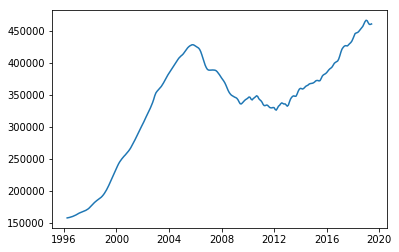

In [61]:
plt.plot(marshfield_data_t)
plt.show()

# Differencing

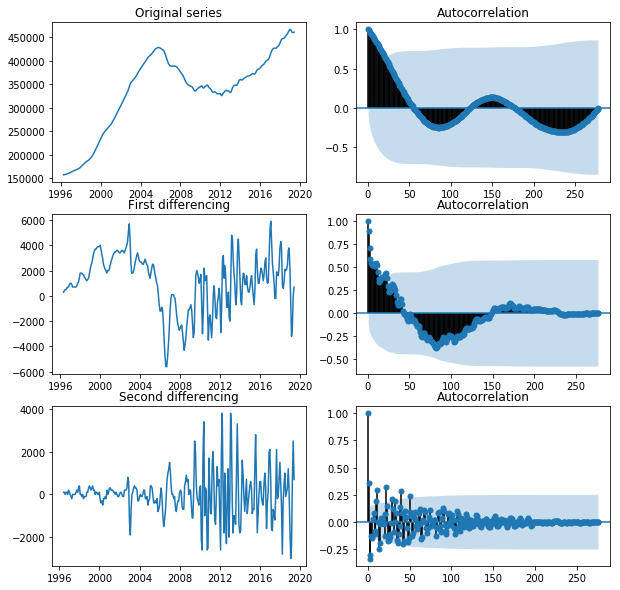

In [62]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

## Original

ax0 = plt.subplot(3, 2, 1)
ax0.plot(marshfield_data_t.price)
ax0.set_title('Original series')

ax1 = plt.subplot(3, 2, 2)
plot_acf(marshfield_data_t.price, ax=ax1)

## 1st differencing

ax2 = plt.subplot(3, 2, 3)
ax2.plot(marshfield_data_t.price.diff())
ax2.set_title('First differencing')

ax3 = plt.subplot(3, 2, 4)
plot_acf(marshfield_data_t.price.diff().dropna(), ax=ax3)

## 2nd differencing

ax4 = plt.subplot(3, 2, 5)
ax4.plot(marshfield_data_t.price.diff().diff())
ax4.set_title('Second differencing')

ax5 = plt.subplot(3, 2, 6)
plot_acf(marshfield_data_t.price.diff().diff().dropna(), ax=ax5)

plt.show()

Second order differencing probably best here as the the plot looks most like it roams around a define mean (zero) and the ACF plot reaches zero quite quickly.<br><br>
Use Augmented Dickey Fuller test to check.

In [63]:
## Original series
adf_1 = adfuller(marshfield_data_t.price)
print('p-value: ', adf_1[1])

p-value:  0.1442734497639332


In [64]:
## First difference series
adf_2 = adfuller(marshfield_data_t.price.diff().dropna())
print('p-value: ', adf_2[1])

p-value:  0.3723981134937465


In [65]:
## Second difference series
adf_3 = adfuller(marshfield_data_t.price.diff().diff().dropna())
print('p-value: ', adf_3[1])

p-value:  6.598883215073394e-06


# AR terms

Use PACF plot to choose the correct number of AR terms. Need to find the number of lags that look significant.

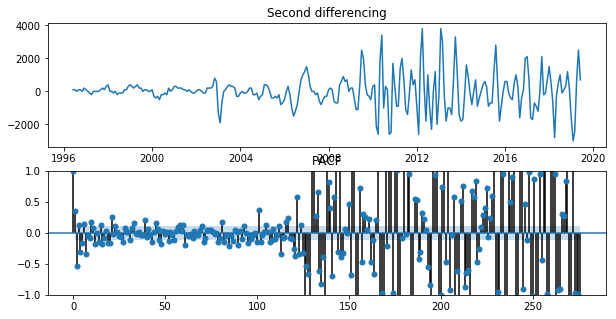

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax0 = plt.subplot(2, 1, 1)
ax0.plot(marshfield_data_t.price.diff().diff())
ax0.set_title('Second differencing')

ax1 = plt.subplot(2, 1, 2)
plot_pacf(marshfield_data_t.price.diff().diff().dropna(), ax=ax1)
ax1.set_title('PACF')
ax1.set(ylim=(-1, 1))

plt.show()

First 2 lags look significant so will begin by setting AR(p) = 2.

# MA terms

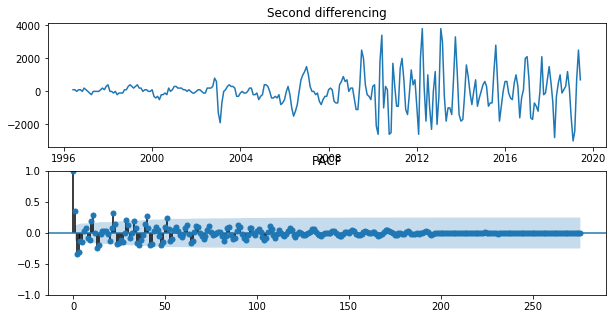

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax0 = plt.subplot(2, 1, 1)
ax0.plot(marshfield_data_t.price.diff().diff())
ax0.set_title('Second differencing')

ax1 = plt.subplot(2, 1, 2)
plot_acf(marshfield_data_t.price.diff().diff().dropna(), ax=ax1)
ax1.set_title('PACF')
ax1.set(ylim=(-1, 1))

plt.show()

Potentially 3 MA(q) terms here.

# Models

In [68]:
model_223 = ARIMA(marshfield_data_t.price, order=(2, 2, 3))
model_223_fit = model_223.fit()
print(model_223_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -2206.262
Method:                       css-mle   S.D. of innovations            693.044
Date:                Wed, 31 Jul 2019   AIC                           4426.524
Time:                        18:18:04   BIC                           4451.892
Sample:                    06-01-1996   HQIC                          4436.703
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6954     21.585     -0.032      0.974     -43.002      41.611
ar.L1.D2.price     0.0547      0.083      0.658      0.511      -0.108       0.218
ar.L2.D2.price     0.0850      0.085

All the MA terms are significant but none of the AR ones are. I will try some other versions of ARIMA.

In [69]:
model_123 = ARIMA(marshfield_data_t.price, order=(1, 2, 3))
model_123_fit = model_123.fit()
print(model_123_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2206.764
Method:                       css-mle   S.D. of innovations            694.263
Date:                Wed, 31 Jul 2019   AIC                           4425.528
Time:                        18:19:26   BIC                           4447.272
Sample:                    06-01-1996   HQIC                          4434.252
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1294     23.082     -0.049      0.961     -46.370      44.111
ar.L1.D2.price     0.0510      0.087      0.589      0.556      -0.119       0.221
ma.L1.D2.price     0.6643      0.063

In [74]:
#model_023 = ARIMA(marshfield_data_t.price, order=(0, 2, 3),)
#model_023_fit = model_023.fit()
#print(model_023_fit.summary())

## This model is not invertible so cannot be fitted

In [75]:
model_323 = ARIMA(marshfield_data_t.price, order=(3, 2, 3))
model_323_fit = model_323.fit()
print(model_323_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -2206.192
Method:                       css-mle   S.D. of innovations            692.851
Date:                Wed, 31 Jul 2019   AIC                           4428.385
Time:                        18:31:29   BIC                           4457.377
Sample:                    06-01-1996   HQIC                          4440.017
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5378     21.184     -0.025      0.980     -42.058      40.983
ar.L1.D2.price     0.0663      0.088      0.755      0.451      -0.106       0.238
ar.L2.D2.price     0.0805      0.085

In [78]:
# model_022 = ARIMA(marshfield_data_t.price, order=(0, 2, 2))
# model_022_fit = model_022.fit()
# print(model_022_fit.summary())

## Also not invertible

In [79]:
model_021 = ARIMA(marshfield_data_t.price, order=(0, 2, 1))
model_021_fit = model_021.fit()
print(model_021_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -2257.428
Method:                       css-mle   S.D. of innovations            836.856
Date:                Wed, 31 Jul 2019   AIC                           4520.855
Time:                        18:33:02   BIC                           4531.727
Sample:                    06-01-1996   HQIC                          4525.218
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6392     82.554      0.008      0.994    -161.164     162.442
ma.L1.D2.price     0.6441      0.036     17.874      0.000       0.574       0.715
                                    

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Model 123 is looking best so far, though it is a shame model 023 wouldn't run as I think that would be better.

# Auto ARIMA

In [80]:
auto_model = pm.auto_arima(marshfield_data_t.price,
                          test='adf',
                          max_p=5, max_q=5,
                          m=1,
                          d=None,
                          seasonal=False,
                          error_action='ignore',
                          stepwise=True)
print(auto_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  277
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2206.764
Method:                       css-mle   S.D. of innovations            694.263
Date:                Wed, 31 Jul 2019   AIC                           4425.528
Time:                        18:37:19   BIC                           4447.272
Sample:                             2   HQIC                          4434.252
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1294     23.082     -0.049      0.961     -46.370      44.111
ar.L1.D2.y     0.0510      0.087      0.589      0.556      -0.119       0.221
ma.L1.D2.y     0.6643      0.063     10.498      0.0

It found the same best model!

# Test model

In [81]:
marshfield_data_t.shape

(279, 1)

In [87]:
train_m = marshfield_data_t[:255]
test_m = marshfield_data_t[255:]

In [90]:
model_123_train = ARIMA(train_m, order=(1, 2, 3))
model_123_train_fit = model_123_train.fit()
print(model_123_train_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  253
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2006.369
Method:                       css-mle   S.D. of innovations            669.391
Date:                Wed, 31 Jul 2019   AIC                           4024.737
Time:                        18:42:24   BIC                           4045.938
Sample:                    06-01-1996   HQIC                          4033.267
                         - 06-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.7351     24.606      0.233      0.816     -42.492      53.962
ar.L1.D2.price     0.0633      0.095      0.668      0.505      -0.122       0.249
ma.L1.D2.price     0.6646      0.071

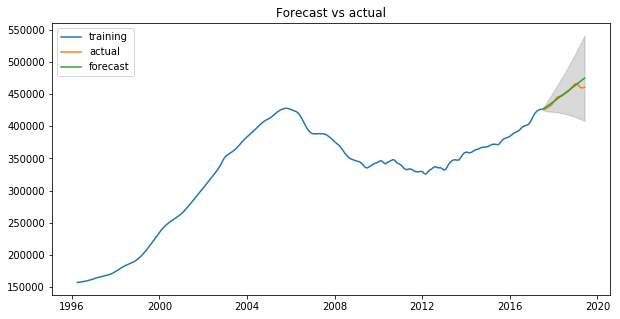

In [92]:
forecast, se, conf = model_123_train_fit.forecast(24, alpha=0.05)

forecast_series = pd.Series(forecast, index=test_m.index)
lower_series = pd.Series(conf[:, 0], index=test_m.index)
upper_series = pd.Series(conf[:, 1], index=test_m.index)

plt.figure(figsize=(10, 5))
plt.plot(train_m, label='training')
plt.plot(test_m, label='actual')
plt.plot(forecast_series, label='forecast')
plt.fill_between(lower_series.index,
                lower_series,
                upper_series,
                color='k',
                alpha=.15)
plt.title('Forecast vs actual')
plt.legend(loc='upper left')
plt.show()

# Seasonality

Use auto-ARIMA to see if annual seasonality plays a part.

In [119]:
start_time = time.process_time()
auto_model_s = pm.auto_arima(marshfield_data_t.price,
                              test='adf',
                              max_p=5, max_q=5,
                              m=12,
                              d=None,
                              seasonal=True,
                              D=1,
                              error_action='ignore',
                              stepwise=True)
print(time.process_time() - start_time)


/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals

78.50298100000009


In [120]:
print(auto_model_s.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  279
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2420.540
Date:                            Thu, 01 Aug 2019   AIC                           4853.080
Time:                                    10:27:26   BIC                           4874.581
Sample:                                         0   HQIC                          4861.718
                                            - 279                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     26.8469    135.257      0.198      0.843    -238.253     291.946
ar.L1          0.0742      0.005   

Test the seasonal model:

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


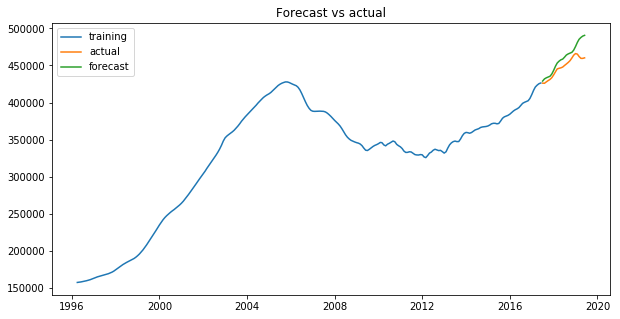

In [140]:
model_210_21012 = SARIMAX(train_m, order=(2, 1, 0), 
                          seasonal_order=(2, 1, 0, 12))
model_210_21012_fit = model_210_21012.fit()

forecast2 = model_210_21012_fit.forecast(24)

# forecast2, se2, conf2 = 
forecast_series2 = pd.Series(forecast2, index=test_m.index)
# lower_series2 = pd.Series(conf2[:, 0], index=test_m.index)
# upper_series2 = pd.Series(conf2[:, 1], index=test_m.index)

plt.figure(figsize=(10, 5))
plt.plot(train_m, label='training')
plt.plot(test_m, label='actual')
plt.plot(forecast_series2, label='forecast')
# plt.fill_between(lower_series2.index,
#                 lower_series2,
#                 upper_series2,
#                 color='k',
#                 alpha=.15)
plt.title('Forecast vs actual')
plt.legend(loc='upper left')
plt.show()

Non seasonal one actually looks better.

# Same for new dataset?

In [93]:
np.random.randint(0, 15689)

6778

In [95]:
zc.loc[6778:6778, ]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
6778,65575,18707,Mountain Top,PA,Scranton--Wilkes-Barre--Hazleton,Luzerne County,6779,109100.0,109600.0,110100.0,...,177300,177600,178400,179600,180900,181600,182800,184600,186000,186300


In [97]:
mountaintop_data = zc_data.loc[6778:6778, ]
mountaintop_data_t = mountaintop_data.T
mountaintop_data_t.columns = ['price']

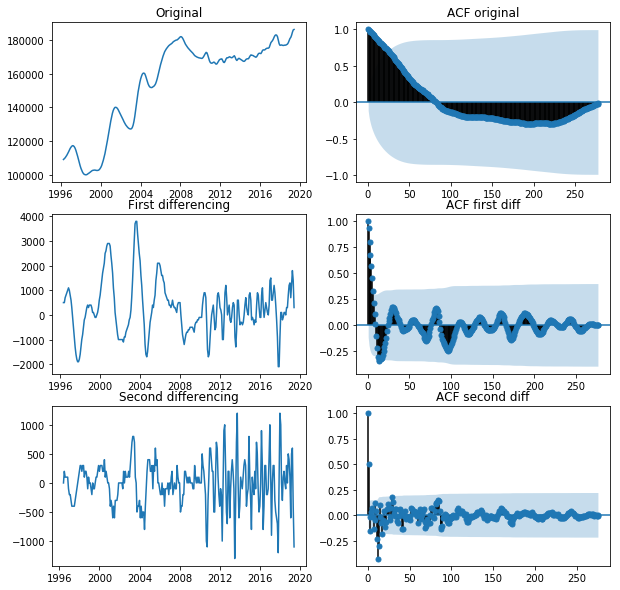

In [102]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax0 = plt.subplot(3, 2, 1)
ax0.plot(mountaintop_data_t.price)
ax0.set_title('Original')

ax1 = plt.subplot(3, 2, 2)
plot_acf(mountaintop_data_t.price, ax=ax1)
ax1.set_title('ACF original')

ax2 = plt.subplot(3, 2, 3)
ax2.plot(mountaintop_data_t.price.diff())
ax2.set_title('First differencing')

ax3 = plt.subplot(3, 2, 4)
plot_acf(mountaintop_data_t.price.diff().dropna(), ax=ax3)
ax3.set_title('ACF first diff')

ax4 = plt.subplot(3, 2, 5)
ax4.plot(mountaintop_data_t.price.diff().diff())
ax4.set_title('Second differencing')

ax5 = plt.subplot(3, 2, 6)
plot_acf(mountaintop_data_t.price.diff().diff().dropna(), ax=ax5)
ax5.set_title('ACF second diff')

plt.show()

Looks to be 2 again for differencing.

In [111]:
## Original series
adf_1a = adfuller(mountaintop_data_t.price)
print('p-value: ', adf_1a[1])

p-value:  0.48054753701173164


In [113]:
## 1st diff
adf_2a = adfuller(mountaintop_data_t.price.diff().dropna())
print('p-value: ', adf_2a[1])

p-value:  0.00029522510225803275


The test actually says first differencing.

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


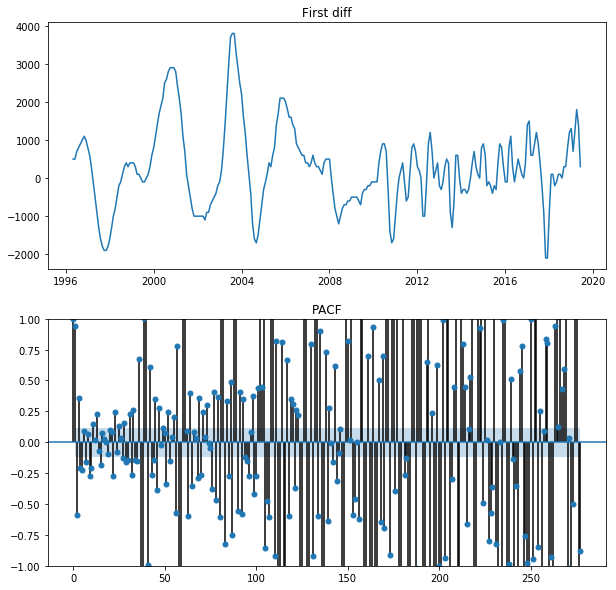

In [141]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax0 = plt.subplot(2, 1, 1)
ax0.plot(mountaintop_data_t.price.diff())
ax0.set_title('First diff')

ax1 = plt.subplot(2, 1, 2)
plot_pacf(mountaintop_data_t.price.diff().dropna(), ax=ax1)
ax1.set_title('PACF')
ax1.set(ylim=(-1, 1))

plt.show()


Potentially 5!

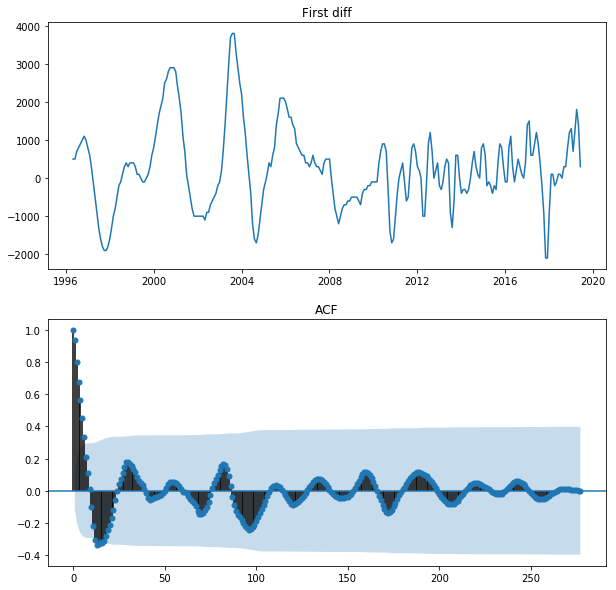

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax0 = plt.subplot(2, 1, 1)
ax0.plot(mountaintop_data_t.price.diff())
ax0.set_title('First diff')

ax1 = plt.subplot(2, 1, 2)
plot_acf(mountaintop_data_t.price.diff().dropna(), ax=ax1)
ax1.set_title('ACF')

plt.show()

6 for MA!

Use auto-ARIMA to check.

In [143]:
auto_model_2 = pm.auto_arima(mountaintop_data_t.price,
                            max_p = 10, max_q = 10,
                            stepwise=True,
                            seasonal=False,
                            test='adf',
                            m=1,
                            d=None)
print(auto_model_2.summary())

/usr/local/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(5, 1, 5); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  278
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -1962.899
Method:                       css-mle   S.D. of innovations            277.166
Date:                Thu, 01 Aug 2019   AIC                           3947.798
Time:                        10:58:06   BIC                           3987.702
Sample:                             1   HQIC                          3963.807
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.6912    125.601      2.211      0.028      31.517     523.866
ar.L1.D.y      2.4203      0.055     44.155      0.000       2.313       2.528
ar.L2.D.y     -2.9166      0.088    -33.046      0.0

/usr/local/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(4, 1, 6); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Well this is different. How different are other models?

In [109]:
model_2_221 = ARIMA(mountaintop_data_t.price, order=(2, 2, 1))
model_2_221_fit = model_2_221.fit()
print(model_2_221_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1981.692
Method:                       css-mle   S.D. of innovations            309.218
Date:                Thu, 01 Aug 2019   AIC                           3973.385
Time:                        10:07:34   BIC                           3991.505
Sample:                    06-01-1996   HQIC                          3980.655
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3169     28.594     -0.081      0.935     -58.360      53.726
ar.L1.D2.price     0.6292      0.112      5.615      0.000       0.410       0.849
ar.L2.D2.price    -0.3420      0.077

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [110]:
model_2_123 = ARIMA(mountaintop_data_t.price, order=(1, 2, 3))
model_2_123_fit = model_2_123.fit()
print(model_2_123_fit.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                  277
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1976.008
Method:                       css-mle   S.D. of innovations            302.796
Date:                Thu, 01 Aug 2019   AIC                           3964.016
Time:                        10:08:11   BIC                           3985.760
Sample:                    06-01-1996   HQIC                          3972.741
                         - 06-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0927     31.368     -0.067      0.947     -63.573      59.387
ar.L1.D2.price    -0.1126      0.476     -0.237      0.813      -1.045       0.820
ma.L1.D2.price     0.8709      0.474

In [144]:
start_time = time.process_time()
auto_model_2_s = pm.auto_arima(mountaintop_data_t.price,
                              test='adf',
                              max_p=5, max_q=5,
                              m=12,
                              d=None,
                              seasonal=True,
                              D=1,
                              error_action='ignore',
                              stepwise=True)
print(time.process_time() - start_time)
print(auto_model_2_s.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


38.50664299999994
                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  279
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2648.405
Date:                            Thu, 01 Aug 2019   AIC                           5306.809
Time:                                    10:58:46   BIC                           5324.746
Sample:                                         0   HQIC                          5314.014
                                            - 279                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    426.6816    577.350      0.739      0.460    -704.904    1558.267
ar.L1          0.

Does not appear to be a consistent model that can be used for both datasets. They have different ARIMA and SARIMAX models.